<a href="https://colab.research.google.com/github/ah20776/CE888---Assignment/blob/main/Ethnicity%20in%20UK%20Policing/Assignment2/Assignment2_Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
# data manipulation libraries
import pandas as pd
import numpy as np

from time import time

# Graphs libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-white')
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly import tools

# Libraries to study
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import LFR, Reweighing
from aif360.algorithms.inprocessing import AdversarialDebiasing, PrejudiceRemover
from aif360.algorithms.postprocessing import CalibratedEqOddsPostprocessing, EqOddsPostprocessing, RejectOptionClassification

# ML libraries
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

# Design libraries
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install 'aif360[all]'

**Data Importing**

In [3]:
#Importing dataset saved in github
!git clone https://github.com/ah20776/CE888---Assignment.git

fatal: destination path 'CE888---Assignment' already exists and is not an empty directory.


In [4]:
#ESSEX
#using dataset already imported

essex18_1 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-01-essex-stop-and-search.csv')
essex18_1["Month"] = "January"
essex18_2 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-02-essex-stop-and-search.csv')
essex18_2["Month"] = "February"
essex18_3 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-03-essex-stop-and-search.csv')
essex18_3["Month"] = "March"
essex18_4 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-04-essex-stop-and-search.csv')
essex18_4["Month"] = "April"
essex18_5 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-05-essex-stop-and-search.csv')
essex18_5["Month"] = "May"
essex18_6 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-06-essex-stop-and-search.csv')
essex18_6["Month"] = "June"
essex18_7 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-07-essex-stop-and-search.csv')
essex18_7["Month"] = "July"
essex18_8 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-08-essex-stop-and-search.csv')
essex18_8["Month"] = "August"
essex18_9 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-09-essex-stop-and-search.csv')
essex18_9["Month"] = "September"
essex18_10 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-10-essex-stop-and-search.csv')
essex18_10["Month"] = "October"
essex18_11 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-11-essex-stop-and-search.csv')
essex18_11["Month"] = "November"
essex18_12 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2018-12-essex-stop-and-search.csv')
essex18_12["Month"] = "December"
essex19_1 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-01-essex-stop-and-search.csv')
essex19_1["Month"] = "January"
essex19_2 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-02-essex-stop-and-search.csv')
essex19_2["Month"] = "February"
essex19_3 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-03-essex-stop-and-search.csv')
essex19_3["Month"] = "March"
essex19_4 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-04-essex-stop-and-search.csv')
essex19_4["Month"] = "April"
essex19_5 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-05-essex-stop-and-search.csv')
essex19_5["Month"] = "May"
essex19_6 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-06-essex-stop-and-search.csv')
essex19_6["Month"] = "June"
essex19_7 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-07-essex-stop-and-search.csv')
essex19_7["Month"] = "July"
essex19_8 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-08-essex-stop-and-search.csv')
essex19_8["Month"] = "August"
essex19_9 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-09-essex-stop-and-search.csv')
essex19_9["Month"] = "September"
essex19_10 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-10-essex-stop-and-search.csv')
essex19_10["Month"] = "October"
essex19_11 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-11-essex-stop-and-search.csv')
essex19_11["Month"] = "November"
essex19_12 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2019-12-essex-stop-and-search.csv')
essex19_12["Month"] = "December"
essex20_1 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-01-essex-stop-and-search.csv')
essex20_1["Month"] = "January"
essex20_2 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-02-essex-stop-and-search.csv')
essex20_2["Month"] = "February"
essex20_3 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-03-essex-stop-and-search.csv')
essex20_3["Month"] = "March"
essex20_4 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-04-essex-stop-and-search.csv')
essex20_4["Month"] = "April"
essex20_5 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-05-essex-stop-and-search.csv')
essex20_5["Month"] = "May"
essex20_6 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-06-essex-stop-and-search.csv')
essex20_6["Month"] = "June"
essex20_7 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-07-essex-stop-and-search.csv')
essex20_7["Month"] = "July"
essex20_8 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-08-essex-stop-and-search.csv')
essex20_8["Month"] = "August"
essex20_9 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-09-essex-stop-and-search.csv')
essex20_9["Month"] = "September"
essex20_10 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-10-essex-stop-and-search.csv')
essex20_10["Month"] = "October"
essex20_11 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-11-essex-stop-and-search.csv')
essex20_11["Month"] = "November"
essex20_12 = pd.read_csv('/content/CE888---Assignment/Ethnicity in UK Policing/Essex 2018-20/2020-12-essex-stop-and-search.csv')
essex20_12["Month"] = "December"
essex18 = pd.concat([essex18_1,essex18_2,essex18_3,essex18_4,essex18_5,essex18_6,essex18_7,essex18_8,essex18_9,essex18_10,essex18_11,essex18_12])
essex18["Year"] = 2018
essex19 = pd.concat([essex19_1,essex19_2,essex19_3,essex19_4,essex19_5,essex19_6,essex19_7,essex19_8,essex19_9,essex19_10,essex19_11,essex19_12])
essex19["Year"] = 2019
essex20 = pd.concat([essex20_1,essex20_2,essex20_3,essex20_4,essex20_5,essex20_6,essex20_7,essex20_8,essex20_9,essex20_10,essex20_11,essex20_12])
essex20["Year"] = 2020
essex = pd.concat([essex18,essex19,essex20])
essex["City"] = "Essex"
essex= pd.DataFrame(essex)
essex.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Month,Year,City
0,Person search,2018-01-01T00:01:00+00:00,False,NaN,51.544045,0.693247,Male,25-34,Black/African/Caribbean/Black British - African,Black,Police and Criminal Evidence Act 1984 (section 1),Evidence of offences under the Act,Nothing found - no further action,False,False,January,2018,Essex
1,Person search,2018-01-01T02:01:00+00:00,False,NaN,51.739265,0.679219,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found - no further action,False,False,January,2018,Essex
2,Person search,2018-01-01T18:01:00+00:00,False,NaN,51.571156,0.485254,Male,18-24,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,False,False,January,2018,Essex
3,Person search,2018-01-01T18:01:00+00:00,False,NaN,51.571156,0.485254,Male,18-24,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,False,False,January,2018,Essex
4,Vehicle search,2018-01-01T18:01:00+00:00,False,NaN,51.571369,0.486247,NaN,NaN,NaN,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,False,NaN,January,2018,Essex


**Data Cleaning and Data Wrangling**

In [5]:
essex.columns = essex.columns.str.lower().str.replace(' ', '_')

In [6]:
essex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43767 entries, 0 to 421
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   type                                      43767 non-null  object 
 1   date                                      43767 non-null  object 
 2   part_of_a_policing_operation              43767 non-null  bool   
 3   policing_operation                        0 non-null      float64
 4   latitude                                  42992 non-null  float64
 5   longitude                                 42992 non-null  float64
 6   gender                                    41290 non-null  object 
 7   age_range                                 40262 non-null  object 
 8   self-defined_ethnicity                    41315 non-null  object 
 9   officer-defined_ethnicity                 40893 non-null  object 
 10  legislation                         

In [7]:
essex.shape

(43767, 18)

In [8]:
#Getting subset
sort = essex[['type','date','gender','age_range','officer-defined_ethnicity','object_of_search','outcome']]
data = sort.dropna()
data = data.reset_index(drop=True)
data.describe()

,type,date,gender,age_range,officer-defined_ethnicity,object_of_search,outcome
count,39415,39415,39415,39415,39415,39415,39415
unique,2,12728,2,5,4,8,15
top,Person search,2019-09-17T08:01:00+00:00,Male,18-24,White,Controlled drugs,A no further action disposal
freq,28977,65,34857,14873,32172,26726,28298


In [9]:
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.date

In [10]:
data.rename({'officer-defined_ethnicity':'ethnicity'}, axis=1, inplace=True)
data.head()

,type,date,gender,age_range,ethnicity,object_of_search,outcome
0,Person search,2018-01-01,Male,25-34,Black,Evidence of offences under the Act,Nothing found - no further action
1,Person search,2018-01-01,Male,25-34,White,Stolen goods,Nothing found - no further action
2,Person search,2018-01-01,Male,18-24,White,Controlled drugs,Nothing found - no further action
3,Person search,2018-01-01,Male,18-24,White,Controlled drugs,Nothing found - no further action
4,Person search,2018-01-01,Male,18-24,White,Controlled drugs,Nothing found - no further action


**Data Analysis**

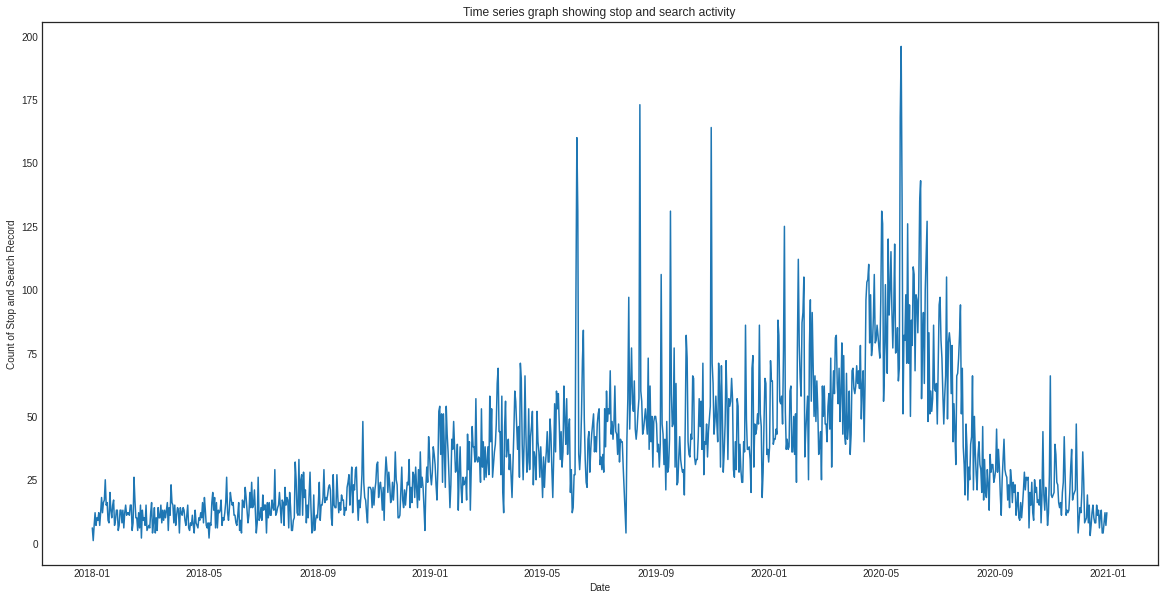

In [11]:
count_by_date = data.groupby('date').size()

plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Count of Stop and Search Record')
plt.title('Time series graph showing stop and search activity')
plt.plot(count_by_date);

In [12]:
data['ethnicity'].value_counts()

White    32172
Black     4059
Asian     1689
Other     1495
Name: ethnicity, dtype: int64

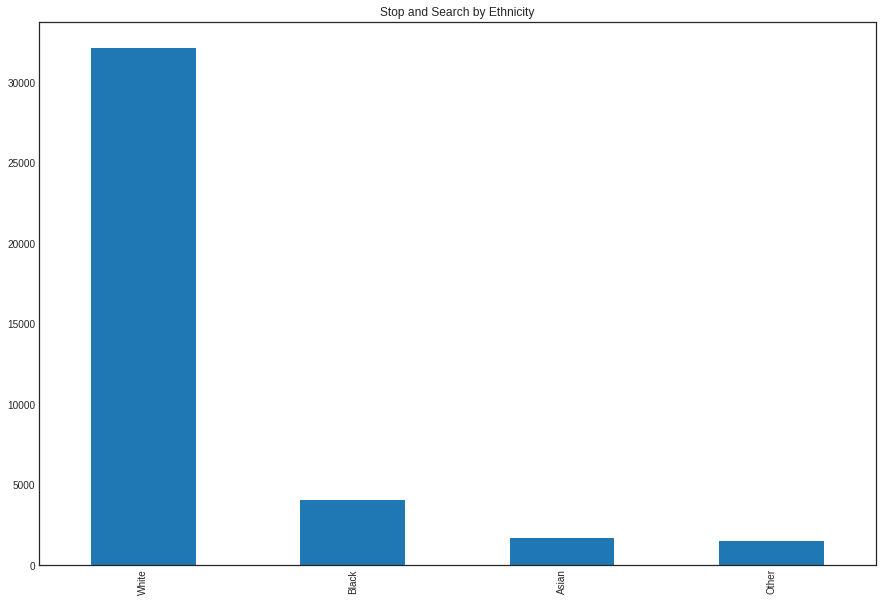

In [13]:
data['ethnicity'].value_counts().plot.bar(title='Stop and Search by Ethnicity',figsize=(15,10));

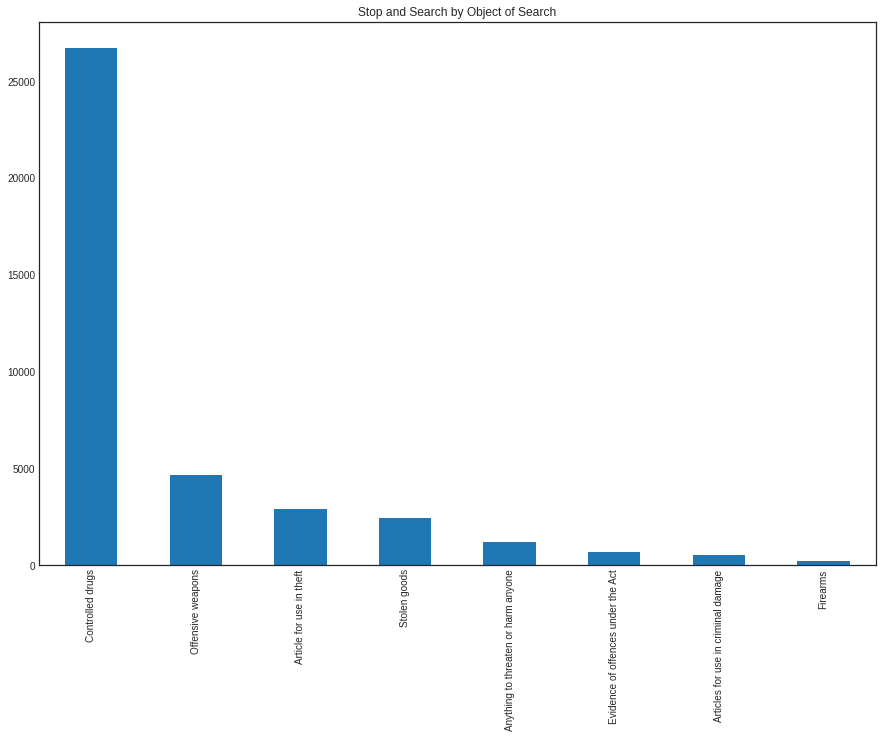

In [14]:
data['object_of_search'].value_counts().plot.bar(title='Stop and Search by Object of Search',figsize=(15,10));

So the most common thing is for a white person to get stopped under the objection of police finding controlled drugs.

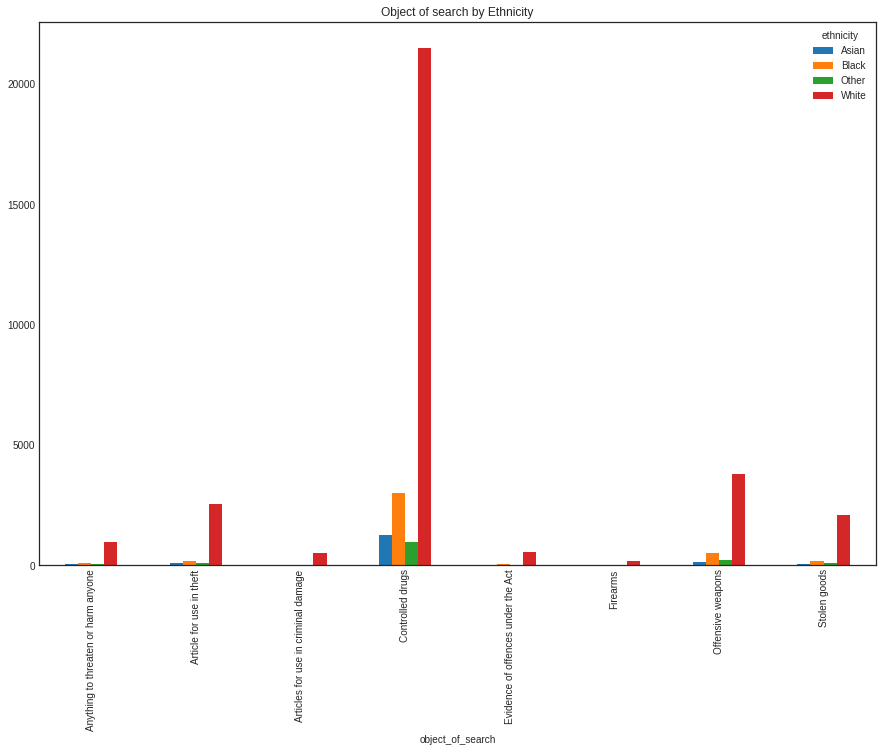

In [15]:
data.groupby('ethnicity')['object_of_search'].value_counts().unstack(0).plot.bar(title='Object of search by Ethnicity', figsize=(15,10));

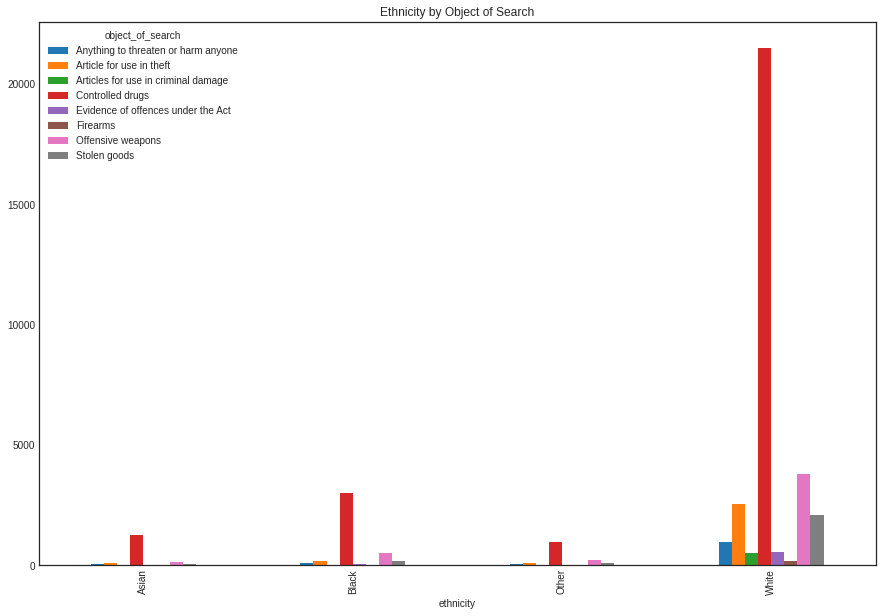

In [16]:
data.groupby('object_of_search')['ethnicity'].value_counts().unstack(0).plot.bar(title='Ethnicity by Object of Search', figsize=(15,10));

This shows us that Controlled Drugs is the most common thing to get stopped for all ethnicities. With Offensive Weapons coming in second. We can also see that White people are ahead for the two main crimes here.

Let's remove all but the top two and do some analysis.

In [17]:
counts = data['object_of_search'].value_counts()
counts
counts[counts > 4000]

Controlled drugs     26726
Offensive weapons     4690
Name: object_of_search, dtype: int64

In [18]:
drugs = data.object_of_search == 'Controlled drugs'
weapons = data.object_of_search == 'Offensive weapons'

In [19]:
drugs_p_weapons = data.object_of_search[weapons].count() + data.object_of_search[weapons].count()

In [20]:
drugs_prc = data.object_of_search[drugs].count() / drugs_p_weapons
weapons_prc = data.object_of_search[weapons].count() / drugs_p_weapons

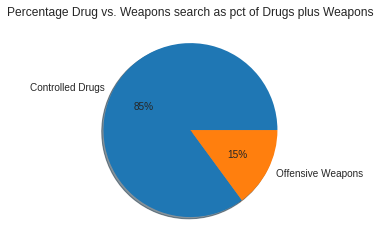

In [21]:
# this will plot a pie chart for us
labels = 'Controlled Drugs', 'Offensive Weapons'
fracs = [drugs_prc, weapons_prc]
explode = (0,0)
plt.axis("equal")
plt.title('Percentage Drug vs. Weapons search as pct of Drugs plus Weapons')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

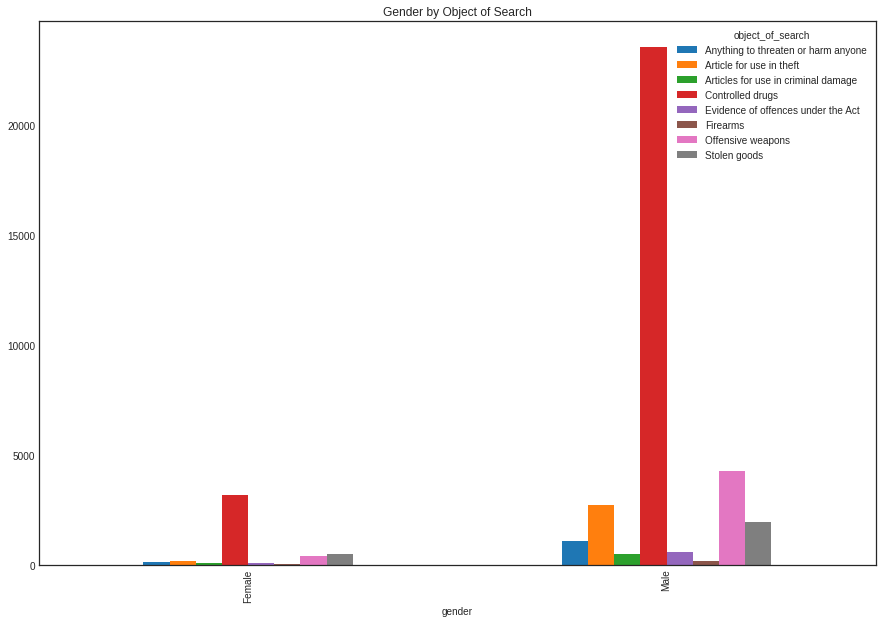

In [22]:
data.groupby('object_of_search')['gender'].value_counts().unstack(0).plot.bar(title='Gender by Object of Search', figsize=(15,10));

Well males are the overwhelming majority here but the trend still continues for the controlled drug searches. To show how much a majority of males there is lets make a pie chart.

In [23]:
gender_male = data.gender == 'Male'
gender_female = data.gender == 'Female'

In [24]:
gender_male_prc = data.gender[gender_male].count() / len(data)
gender_female_prc = data.gender[gender_female].count() / len(data)

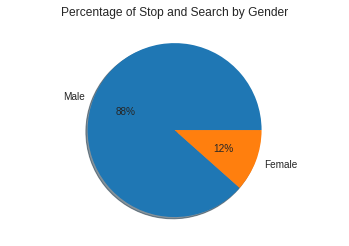

In [25]:
labels = 'Male', 'Female'
fracs = [gender_male_prc, gender_female_prc]
explode = (0.0,0)
plt.axis("equal")
plt.title('Percentage of Stop and Search by Gender')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

In [26]:
age_u10 = data.age_range == 'under 10'
age_10 = data.age_range == '10-17'
age_18 = data.age_range == '18-24'
age_25 = data.age_range == '25-34'
age_34 = data.age_range == 'over 34'

In [27]:
age_u10_prc = data.age_range[age_u10].count() / len(data)
age_10_prc = data.age_range[age_10].count() / len(data)
age_18_prc = data.age_range[age_18].count() / len(data)
age_25_prc = data.age_range[age_25].count() / len(data)
age_34_prc = data.age_range[age_34].count() / len(data)

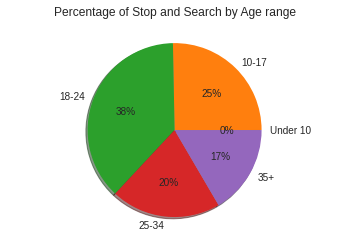

In [28]:
labels = 'Under 10', '10-17', '18-24', '25-34', '35+'
fracs = [age_u10_prc, age_10_prc, age_18_prc, age_25_prc, age_34_prc]
explode = (0,0,0,0,0)
plt.axis("equal")
plt.title('Percentage of Stop and Search by Age range')
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True);

This is more interesting - 25% of the dataset is from 10 to 17. This is very young! Overall the 10-17 and 18-24 groups make up 63%! This really shows who police are viewing as committing the crimes and not who is committing crimes, but it is a interesting insight.

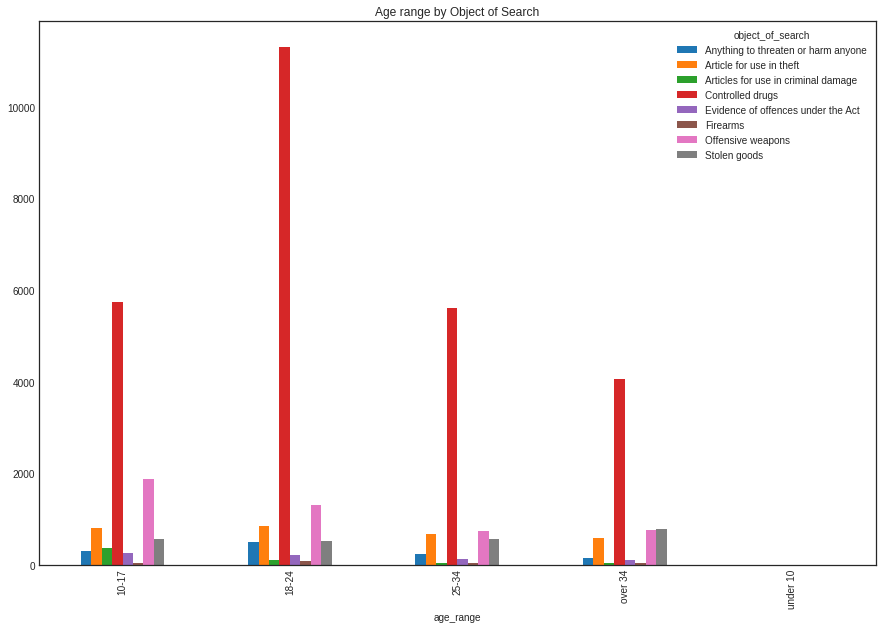

In [29]:
data.groupby('object_of_search')['age_range'].value_counts().unstack(0).plot.bar(title='Age range by Object of Search', figsize=(15,10));

We can see that 10-17 year olds are ahead for having offensive weapons here. We can also see just how overwhelmingly 18-24 year olds are getting stopped for drug related crimes.

Finally lets look at some time series graph to see if any trends have increased or decreased over the time series.

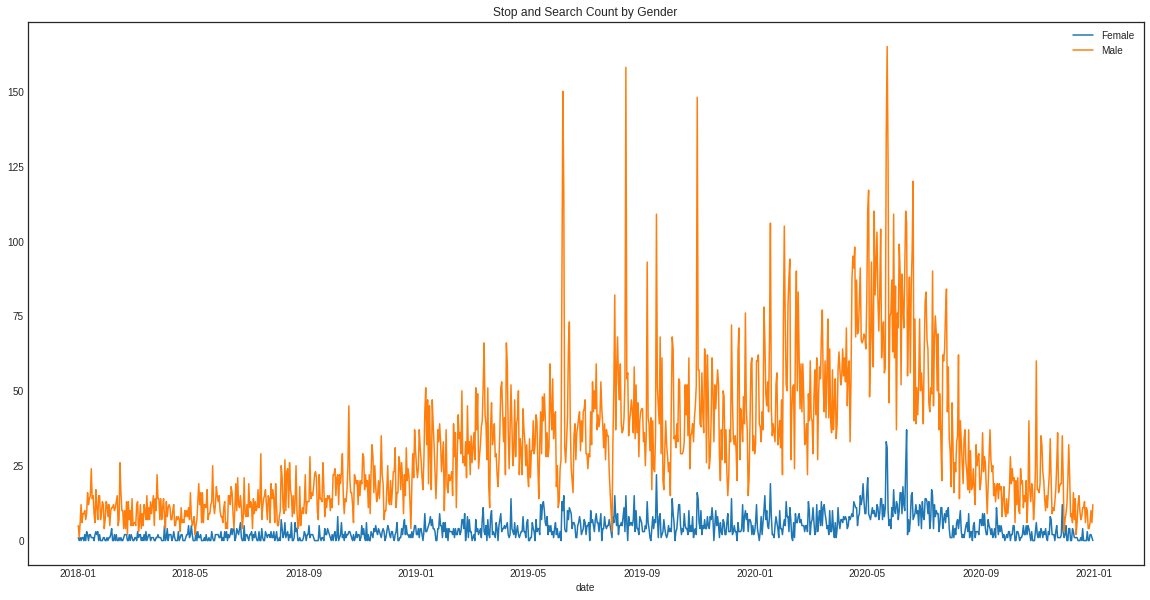

In [30]:
gender_count = data.groupby('date')
gender_count = gender_count.gender.apply(pd.value_counts).unstack(-1).fillna(0)


gender_count.plot(kind='line',figsize=(20,10), title='Stop and Search Count by Gender');

Slight downward trend in males and females looks to stay steady. It looks like there are some seasonal shifts in the data - especially obvious from August 2020.

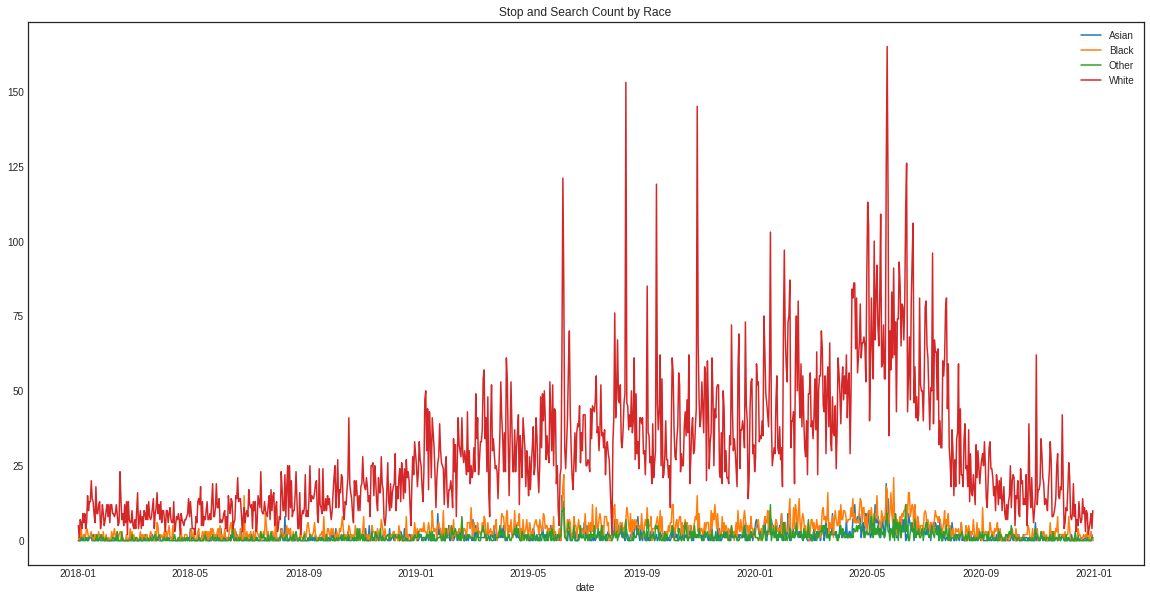

In [31]:
race_count = data.groupby('date')
race_count = race_count.ethnicity.apply(pd.value_counts).unstack(-1).fillna(0)

race_count.plot(kind='line',figsize=(20,10), title='Stop and Search Count by Race');

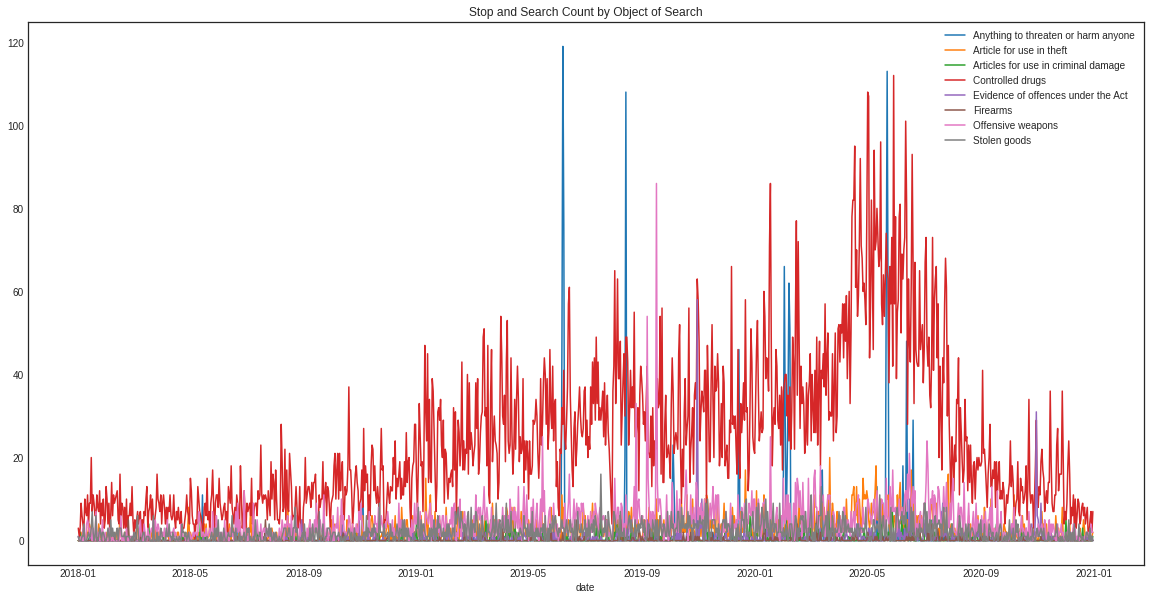

In [32]:
object_count = data.groupby('date')
object_count = object_count.object_of_search.apply(pd.value_counts).unstack(-1).fillna(0)

object_count.plot(kind='line',figsize=(20,10), title='Stop and Search Count by Object of Search');

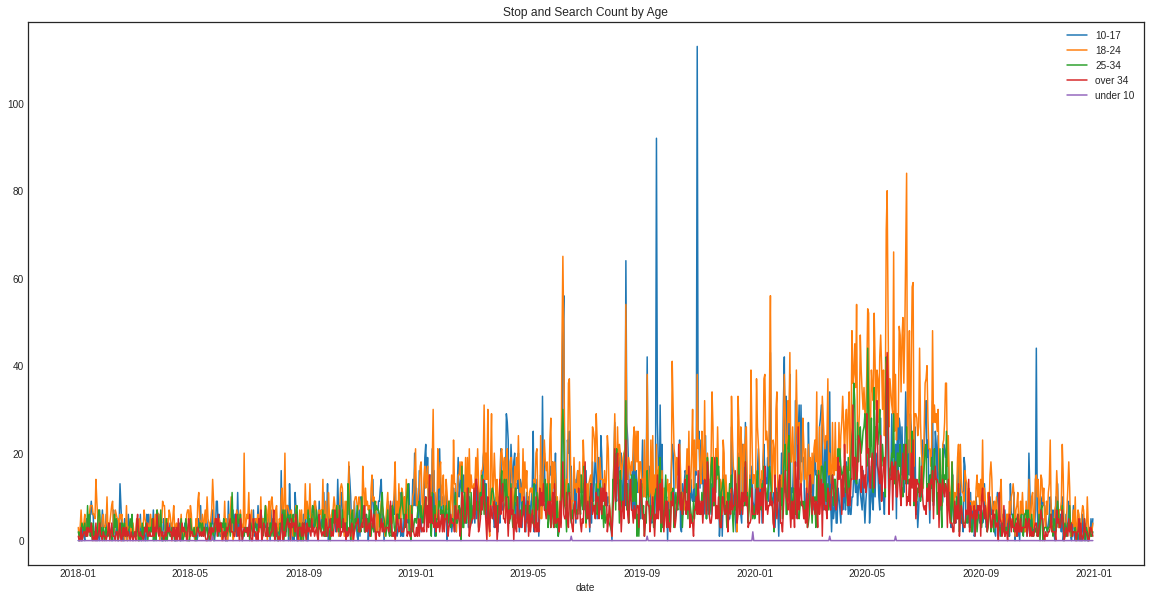

In [33]:
age_count = data.groupby('date')
age_count = age_count.age_range.apply(pd.value_counts).unstack(-1).fillna(0)
age_count.plot(kind='line', figsize=(20,10), title='Stop and Search Count by Age');

We can see the two main reasons for stopping someone is for either suspected possesion of a controlled substance, drugs; or offensive weapons. These trends are the same throuhgout Race, Age and Gender.

In [34]:
data['outcome'].value_counts()

A no further action disposal                    28298
Arrest                                           4075
Khat or Cannabis warning                         3424
Community resolution                             1883
Nothing found - no further action                 665
Caution (simple or conditional)                   423
Summons / charged by post                         224
Offender given drugs possession warning           120
Suspect arrested                                  116
Penalty Notice for Disorder                        81
Local resolution                                   45
Article found - Detailed outcome unavailable       23
Offender cautioned                                 16
Suspect summonsed to court                         12
Offender given penalty notice                      10
Name: outcome, dtype: int64

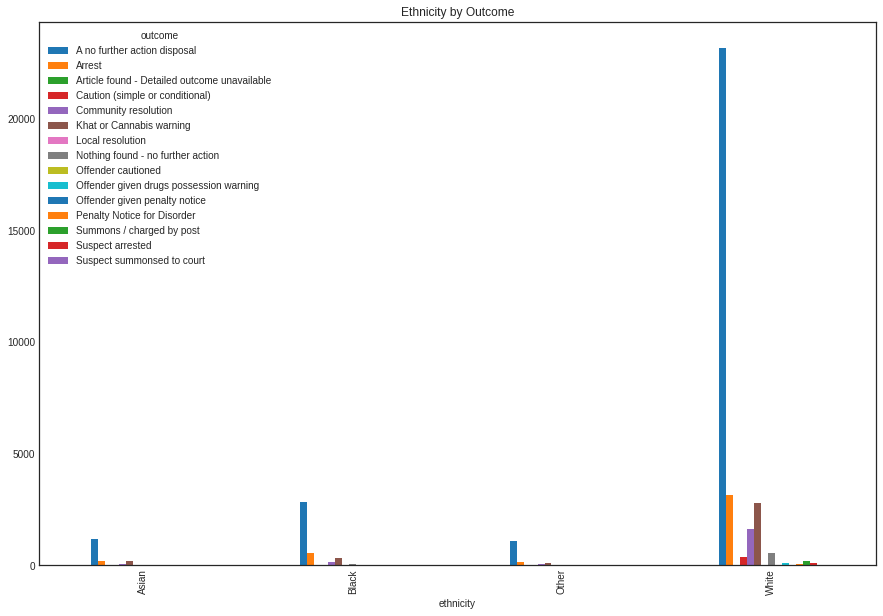

In [35]:
data.groupby('outcome')['ethnicity'].value_counts().unstack(0).plot.bar(title='Ethnicity by Outcome', figsize=(15,10));

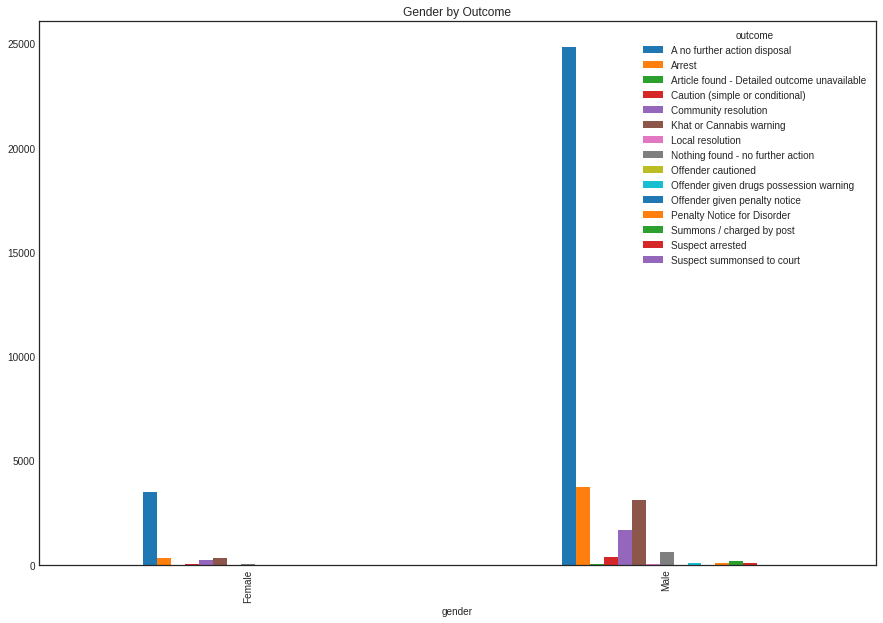

In [36]:
data.groupby('outcome')['gender'].value_counts().unstack(0).plot.bar(title='Gender by Outcome', figsize=(15,10));

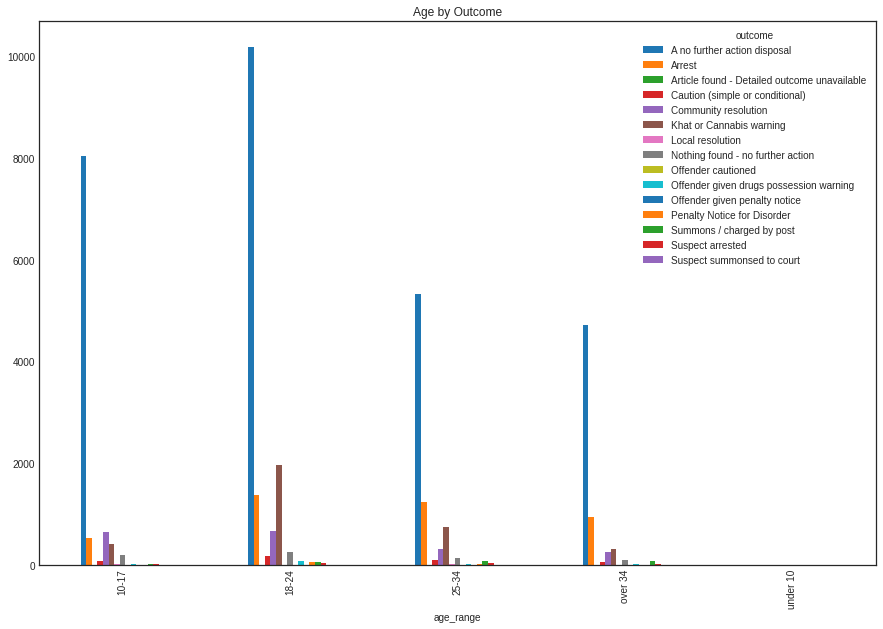

In [37]:
data.groupby('outcome')['age_range'].value_counts().unstack(0).plot.bar(title='Age by Outcome', figsize=(15,10));

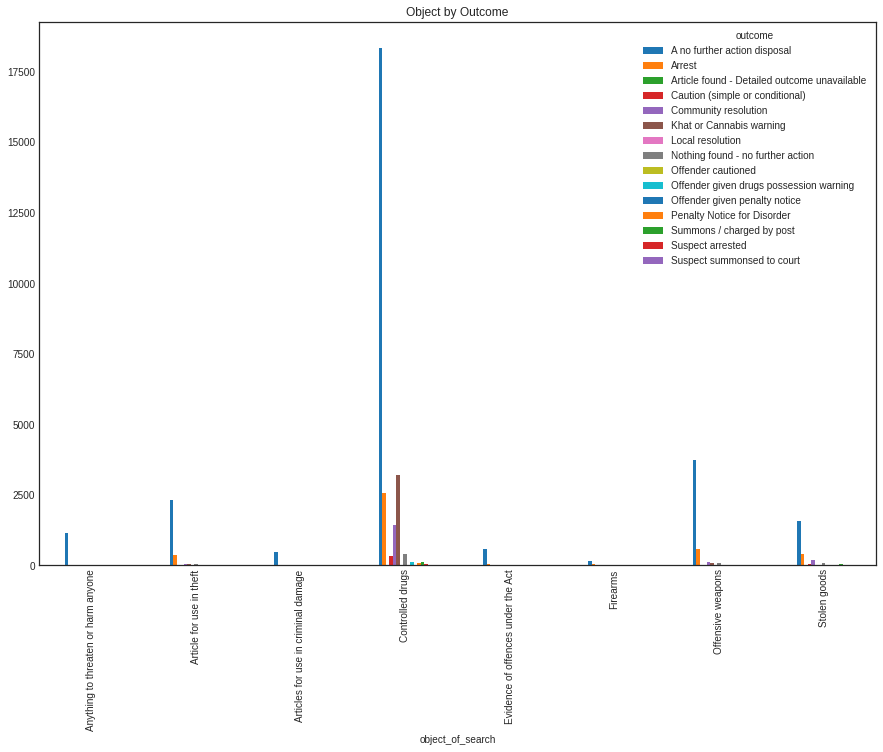

In [38]:
data.groupby('outcome')['object_of_search'].value_counts().unstack(0).plot.bar(title='Object by Outcome', figsize=(15,10));

In [39]:
data['gender'].value_counts()

Male      34857
Female     4558
Name: gender, dtype: int64

In [40]:
data['ethnicity'].value_counts()

White    32172
Black     4059
Asian     1689
Other     1495
Name: ethnicity, dtype: int64

In [41]:
data['age_range'].value_counts()

18-24       14873
10-17        9969
25-34        8037
over 34      6529
under 10        7
Name: age_range, dtype: int64

In [42]:
data['object_of_search'].value_counts()

Controlled drugs                       26726
Offensive weapons                       4690
Article for use in theft                2903
Stolen goods                            2427
Anything to threaten or harm anyone     1209
Evidence of offences under the Act       681
Articles for use in criminal damage      554
Firearms                                 225
Name: object_of_search, dtype: int64

In [43]:
Y_columns = ['gender','ethnicity','age_range']

cat_columns = []
num_columns = []

for col in data.columns.values:
    if col in Y_columns:
        continue
    elif data[col].dtypes == 'int64':
        num_columns += [col]
    else:
        cat_columns += [col]

print (Y_columns)

['gender', 'ethnicity', 'age_range']


In [44]:
def target_distribution(y_var, data):
    val = data[y_var]

    plt.style.use('seaborn-whitegrid')
    plt.rcParams.update({'font.size': 13})
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    cnt = val.value_counts().sort_values(ascending=True)
    labels = cnt.index.values

    sizes = cnt.values
    colors = sns.color_palette("PuBu", len(labels))

    #------------COUNT-----------------------
    ax1.barh(cnt.index.values, cnt.values, color=colors)
    ax1.set_title('Count plot of '+y_var)

    #------------PERCENTAGE-------------------
    ax2.pie(sizes, labels=labels, colors=colors,autopct='%1.0f%%', shadow=True, startangle=130)
    ax2.axis('equal')
    ax2.set_title('Distribution of '+y_var)
    plt.show()

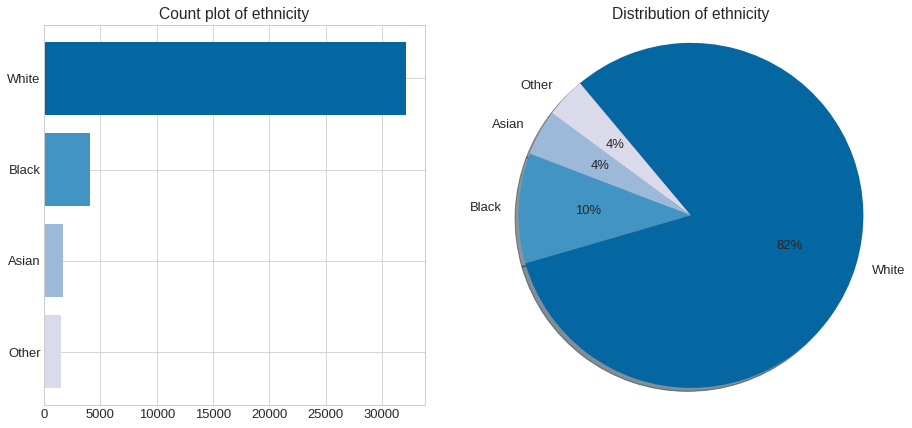

In [45]:
var = 'ethnicity'
target_distribution(y_var=var, data=data)

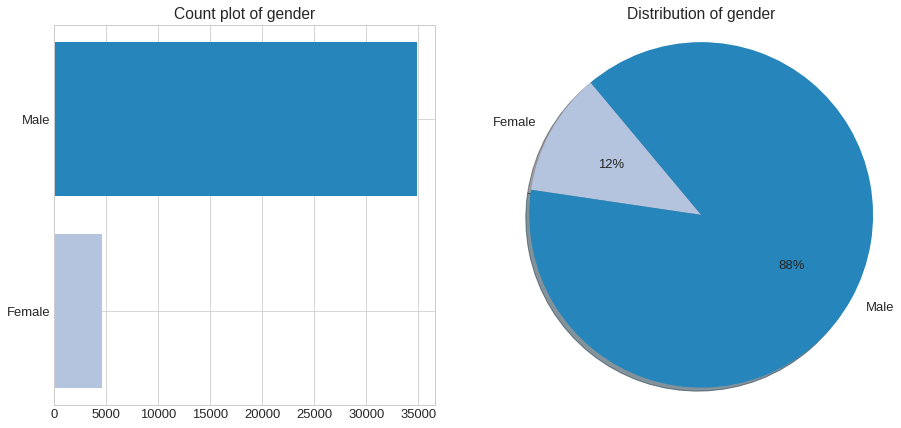

In [46]:
var = 'gender'
target_distribution(y_var=var, data=data)

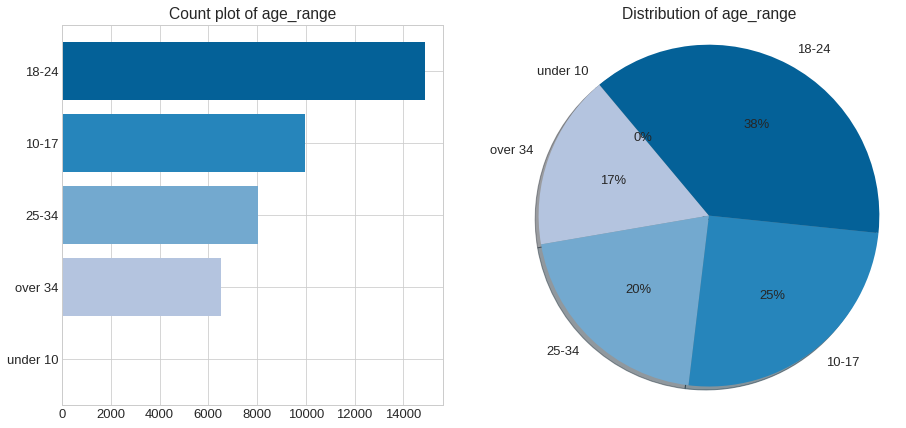

In [47]:
var = 'age_range'
target_distribution(y_var=var, data=data)

In [48]:
data['Frequency'] = 1
freq_target = data[['gender', 'ethnicity', 'age_range', 'Frequency']]
del data['Frequency']
freq_target = freq_target.groupby(by=['gender', 'ethnicity', 'age_range']).count() / len(data)
print(freq_target.sort_values(by='Frequency', ascending=False))


                            Frequency
gender ethnicity age_range           
Male   White     18-24       0.253939
                 10-17       0.190207
                 25-34       0.142966
                 over 34     0.125434
       Black     18-24       0.047317
Female White     18-24       0.035697
                 10-17       0.027477
Male   Black     25-34       0.022555
Female White     over 34     0.021362
Male   Asian     18-24       0.020779
Female White     25-34       0.018978
Male   Black     10-17       0.017760
       Other     18-24       0.013853
       Asian     25-34       0.011265
       Black     over 34     0.009819
       Other     10-17       0.009793
                 25-34       0.006064
       Asian     10-17       0.004973
                 over 34     0.004034
       Other     over 34     0.003501
Female Black     18-24       0.002765
       Other     18-24       0.002182
                 10-17       0.001243
       Black     10-17       0.001066
            

If we based our model on the most frequents values we found that by default there is 25% of chance that the police stopped for searching is a white male of age 18-24.

In [49]:
def plot_histo(data, col, Y_columns):
    df = data.copy()
    fig, axs = plt.subplots(1,2,figsize=(20,6))
    
    for i in range(0,2):
        cnt = []; y_col = Y_columns[i]
        Y_values = df[y_col].dropna().drop_duplicates().values
        for val in Y_values:
            cnt += [df[df[y_col] == val][col].values]
        bins = df[col].nunique()

        axs[i].hist(cnt, bins=bins, stacked=True)
        axs[i].legend(Y_values,loc='upper right')
        axs[i].set_title("Histogram of the "+col+" column by "+y_col)

    plt.show()

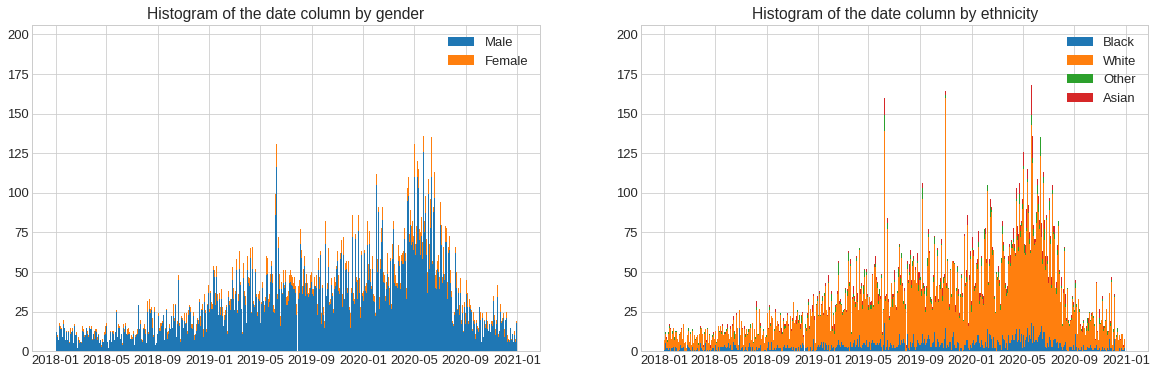

In [50]:
plot_histo(data, col='date',Y_columns=Y_columns)

In [51]:
cat_columns

['type', 'date', 'object_of_search', 'outcome']

In [52]:
categorical_features = cat_columns + ['gender', 'ethnicity', 'age_range']
# categorical_features = categorical_features 
categorical_features_idx = [np.where(data.columns.values == col)[0][0] for col in categorical_features]

del cat_columns

In [53]:
data_encoded = data.copy()

categorical_names = {}
encoders = {}

# Use Label Encoder for categorical columns (including target column)
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(data_encoded[feature])
    
    data_encoded[feature] = le.transform(data_encoded[feature])
    
    categorical_names[feature] = le.classes_
    encoders[feature] = le

In [54]:
numerical_features = [c for c in data.columns.values if c not in categorical_features]

for feature in numerical_features:
    val = data_encoded[feature].values[:, np.newaxis]
    mms = MinMaxScaler().fit(val)
    data_encoded[feature] = mms.transform(val)
    encoders[feature] = mms
    
data_encoded = data_encoded.astype(float)

del num_columns

In [55]:
data_encoded.head()

,type,date,gender,age_range,ethnicity,object_of_search,outcome
0,1.0,0.0,1.0,2.0,1.0,4.0,7.0
1,1.0,0.0,1.0,2.0,3.0,7.0,7.0
2,1.0,0.0,1.0,1.0,3.0,3.0,7.0
3,1.0,0.0,1.0,1.0,3.0,3.0,7.0
4,1.0,0.0,1.0,1.0,3.0,3.0,7.0


This dataset is hard to understand for a human so let's create a function that allows us to get back the original values.

In [56]:
def decode_dataset(data, encoders, numerical_features, categorical_features):
    df = data.copy()
    for feat in df.columns.values:
        if feat in numerical_features:
            df[feat] = encoders[feat].inverse_transform(np.array(df[feat]).reshape(-1, 1))
    for feat in categorical_features:
        df[feat] = encoders[feat].inverse_transform(df[feat].astype(int))
    return df

In [57]:
decode_dataset(data_encoded, encoders=encoders, numerical_features=numerical_features, categorical_features=categorical_features).head()

,type,date,gender,age_range,ethnicity,object_of_search,outcome
0,Person search,2018-01-01,Male,25-34,Black,Evidence of offences under the Act,Nothing found - no further action
1,Person search,2018-01-01,Male,25-34,White,Stolen goods,Nothing found - no further action
2,Person search,2018-01-01,Male,18-24,White,Controlled drugs,Nothing found - no further action
3,Person search,2018-01-01,Male,18-24,White,Controlled drugs,Nothing found - no further action
4,Person search,2018-01-01,Male,18-24,White,Controlled drugs,Nothing found - no further action


**Real Target for the Project**


**Create dataset using aif360**

In [58]:
data_perp_sex = data_encoded.drop(['object_of_search'], axis=1)

In [59]:
privileged_sex = np.where(categorical_names['gender'] == 'Male')[0]
privileged_race = np.where(categorical_names['ethnicity'] == 'White')[0]

In [60]:
data_orig_outcome = StandardDataset(data_perp_sex, 
                               label_name='outcome', 
                               favorable_classes=[1], 
                               protected_attribute_names=['gender', 'ethnicity'], 
                               privileged_classes=[privileged_sex, privileged_race])

In [61]:
def meta_data(dataset):
    # print out some labels, names, etc.
    display(Markdown("#### Dataset shape"))
    print(dataset.features.shape)
    display(Markdown("#### Favorable and unfavorable labels"))
    print(dataset.favorable_label, dataset.unfavorable_label)
    display(Markdown("#### Protected attribute names"))
    print(dataset.protected_attribute_names)
    display(Markdown("#### Privileged and unprivileged protected attribute values"))
    print(dataset.privileged_protected_attributes, dataset.unprivileged_protected_attributes)
    display(Markdown("#### Dataset feature names"))
    print(dataset.feature_names)

In [62]:
meta_data(data_orig_outcome)

#### Dataset shape

(39415, 5)


#### Favorable and unfavorable labels

1.0 0.0


#### Protected attribute names

['gender', 'ethnicity']


#### Privileged and unprivileged protected attribute values

[array([1.]), array([3.])] [array([0.]), array([0., 1., 2.])]


#### Dataset feature names

['type', 'date', 'gender', 'age_range', 'ethnicity']


**First models**


I'd like to remember that the goal of this Kernel is not to get a performant model, but the main goal is to find out how we can prevent bias on our model. So I will just construct a simple Random Forest model.

**Split into train and test set**

In [63]:
np.random.seed(42)

data_orig_outcome_train, data_orig_outcome_test = data_orig_outcome.split([0.7], shuffle=True)

display(Markdown("#### Train Dataset shape"))
print("outcome :",data_orig_outcome_train.features.shape)
display(Markdown("#### Test Dataset shape"))
print("outcome :",data_orig_outcome_test.features.shape)

#### Train Dataset shape

outcome : (27590, 5)


#### Test Dataset shape

outcome : (11825, 5)


In [64]:
# Train and save the models
rf_orig_outcome = RandomForestClassifier().fit(data_orig_outcome_train.features, 
                     data_orig_outcome_train.labels.ravel(), 
                     sample_weight=data_orig_outcome_train.instance_weights)

In [65]:
#predict on test set

X_test_outcome = data_orig_outcome_test.features
y_test_outcome = data_orig_outcome_test.labels.ravel()

In [66]:
def get_model_performance(X_test, y_true, y_pred, probs):
    accuracy = accuracy_score(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)

    return accuracy, matrix, f1, fpr, tpr, roc_auc

def plot_model_performance(model, X_test, y_true):
    y_pred = model.predict(X_test)
    probs = model.predict_proba(X_test)
    accuracy, matrix, f1, fpr, tpr, roc_auc = get_model_performance(X_test, y_true, y_pred, probs)

    display(Markdown('#### Accuracy of the model :'))
    print(accuracy)
    display(Markdown('#### F1 score of the model :'))
    print(f1)

    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_subplot(1, 2, 1)
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')

    ax = fig.add_subplot(1, 2, 2)
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic curve')
    plt.legend(loc="lower right")

#### Accuracy of the model :

0.8630021141649049


#### F1 score of the model :

0.16752312435765673


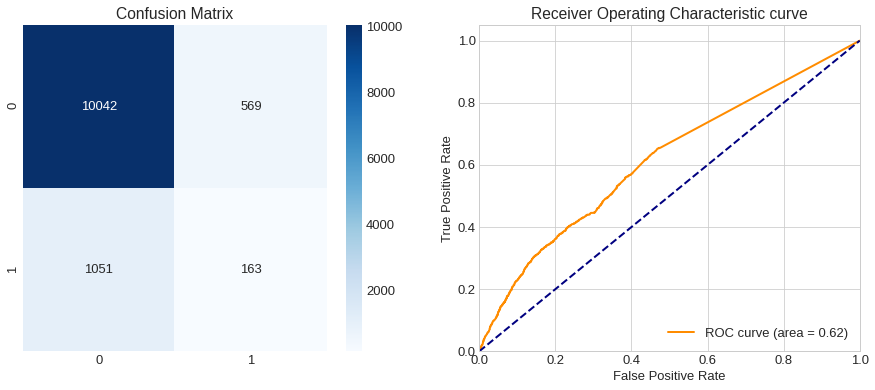

In [67]:
plot_model_performance(rf_orig_outcome, data_orig_outcome_test.features, y_test_outcome)

**Bias and Fairness**

In [68]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [69]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [70]:
def get_fair_metrics_and_plot(data, model, plot=True, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

### Bias metrics for the Outcome model

### Check bias metrics :

A model can be considered bias if just one of these five metrics show that this model is biased.

#### For the gender attribute :

With default thresholds, bias against unprivileged group detected in **0** out of 5 metrics

#### For the ethnicity attribute :

With default thresholds, bias against unprivileged group detected in **1** out of 5 metrics

,statistical_parity_difference,equal_opportunity_difference,average_abs_odds_difference,disparate_impact,theil_index
objective,0.000000,0.000000,0.000000,1.000000,0.000000
gender,0.008303,0.035182,0.022302,1.136242,0.111156
ethnicity,0.073855,0.086975,0.078353,2.437263,0.111156


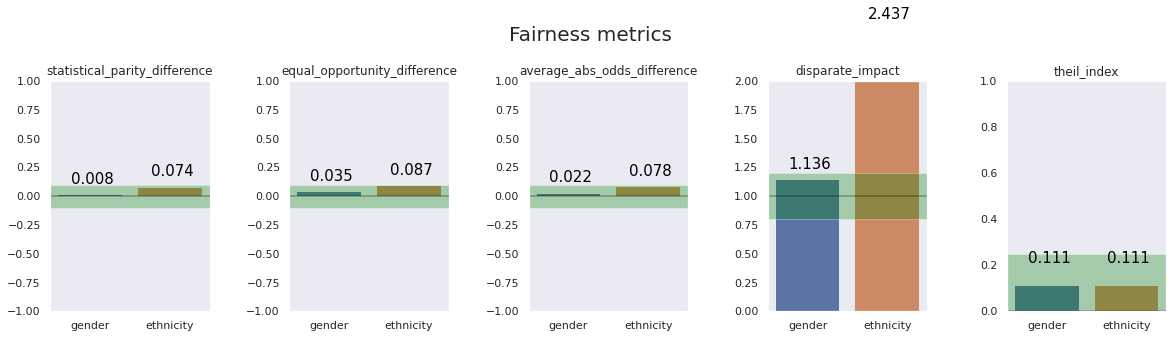

In [71]:
display(Markdown('### Bias metrics for the Outcome model'))
fair = get_fair_metrics_and_plot(data_orig_outcome_test, rf_orig_outcome)

In [72]:
data_orig_test = data_orig_outcome_test
data_orig_train = data_orig_outcome_train
rf = rf_orig_outcome

probs = rf.predict_proba(data_orig_test.features)
preds = rf.predict(data_orig_test.features)
algo_metrics = add_to_df_algo_metrics(algo_metrics, rf, fair, preds, probs, 'Origin')

As we can see, this first model is biased. The next step is to answer the question : How to fix it ?

**How to fix it ?**


AIF360 use 3 types of algorithms :

**Pre-processing algorithms** : they are used before training the model


**In-processing algorithms** : they are fair classifiers so it's during the training


**Post-processing algorithms** : they are used after training the model
Fairness pipeline

This is the **fairness pipeline**. An example instantiation of this generic pipeline consists of loading data into a dataset object, transforming it into a fairer dataset using a fair pre-processing algorithm, learning a classifier from this transformed dataset, and obtaining predictions from this classifier. Metrics can be calculated on the original, transformed, and predicted datasets as well as between the transformed and predicted datasets. Many other instantiations are also possible.



**1. Pre-processing algorithms**


There are 4 pre-processing algorithms but for 3 of them there is a problem : it will work only if the dataset have one protected attribute but here we have 2 : Sex and Race. 

In [73]:
def get_attributes(data, selected_attr=None):
    unprivileged_groups = []
    privileged_groups = []
    if selected_attr == None:
        selected_attr = data.protected_attribute_names
    
    for attr in selected_attr:
            idx = data.protected_attribute_names.index(attr)
            privileged_groups.append({attr:data.privileged_protected_attributes[idx]}) 
            unprivileged_groups.append({attr:data.unprivileged_protected_attributes[idx]}) 

    return privileged_groups, unprivileged_groups

**1.1. Reweighing** **bold text**

In [74]:
privileged_groups, unprivileged_groups = get_attributes(data_orig_train, selected_attr=['ethnicity'])
t0 = time()

RW = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
# RW.fit(data_orig_train)
data_transf_train = RW.fit_transform(data_orig_train)

# Train and save the model
rf_transf = RandomForestClassifier().fit(data_transf_train.features, 
                     data_transf_train.labels.ravel(), 
                     sample_weight=data_transf_train.instance_weights)

data_transf_test = RW.transform(data_orig_test)
fair = get_fair_metrics_and_plot(data_orig_test, rf_transf, plot=False)
probs = rf_transf.predict_proba(data_orig_test.features)
preds = rf_transf.predict(data_orig_test.features)

algo_metrics = add_to_df_algo_metrics(algo_metrics, rf_transf, fair, preds, probs, 'Reweighing')
print('time elapsed : %.2fs'%(time()-t0))

time elapsed : 3.78s


**2. In-processing algorithms**

**2.1. Adversarial Debiasing**

Adversarial debiasing is an in-processing technique that learns a classifier to maximize prediction accuracy and simultaneously reduce an adversary’s ability to determine the protected attribute from the predictions. This approach leads to a fair classifier as the predictions cannot carry any group discrimination information that the adversary can exploit.

In [75]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

privileged_groups, unprivileged_groups = get_attributes(data_orig_train, selected_attr=['ethnicity'])
t0 = time()

# sess.close()
# tf.reset_default_graph()
sess = tf.Session()

debiased_model = AdversarialDebiasing(privileged_groups = privileged_groups,
                          unprivileged_groups = unprivileged_groups,
                          scope_name='debiased_classifier',
                          num_epochs=10,
                          debias=True,
                          sess=sess)

debiased_model.fit(data_orig_train)

fair = get_fair_metrics_and_plot(data_orig_test, debiased_model, plot=False, model_aif=True)
data_pred = debiased_model.predict(data_orig_test)

algo_metrics = add_to_df_algo_metrics(algo_metrics, debiased_model, fair, data_pred.labels, data_pred.scores, 'AdvDebiasing')
print('time elapsed : %.2fs'%(time()-t0))

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
epoch 0; iter: 0; batch classifier loss: 23.296894; batch adversarial loss: -0.726567
epoch 0; iter: 200; batch classifier loss: 1.584139; batch adversarial loss: 0.091426
epoch 1; iter: 0; batch classifier loss: 2.562257; batch adversarial loss: 0.058168
epoch 1; iter: 200; batch classifier loss: 0.785411; batch adversarial loss: -0.184551
epoch 2; iter: 0; batch classifier loss: 0.574363; batch adversarial loss: -0.223166
epoch 2; iter: 200; batch classifier loss: 0.616311; batch adversarial loss: -0.580582
epoch 3; iter: 0; batch classifier loss: 0.485052; batch adversarial loss: -0.564317
epoch 3; iter: 200; batch classifier loss: 0.399964; batch adversarial loss: -1.098177
epoch 4; iter: 0; batch classifier loss: 0.810102; batch adversarial loss: -1.094134
epoch 4; iter: 200; batch cl

 **2.2. Prejudice Remover Regularizer**

 Prejudice remover is an in-processing technique that adds a discrimination-aware regularization term to the learning objective.

In [76]:
t0 = time()
debiased_model = PrejudiceRemover(sensitive_attr="ethnicity", eta = 25.0)
debiased_model.fit(data_orig_train)

fair = get_fair_metrics_and_plot(data_orig_test, debiased_model, plot=False, model_aif=True)
data_pred = debiased_model.predict(data_orig_test)

algo_metrics = add_to_df_algo_metrics(algo_metrics, debiased_model, fair, data_pred.labels, data_pred.scores, 'PrejudiceRemover')
print('time elapsed : %.2fs'%(time()-t0))

time elapsed : 166.60s


 **3. Post-processing algorithms**

 It exists 3 post-processing algorithms with aif360.

In [77]:
data_orig_test_pred = data_orig_test.copy(deepcopy=True)

# Prediction with the original RandomForest model
scores = np.zeros_like(data_orig_test.labels)
scores = rf.predict_proba(data_orig_test.features)[:,1].reshape(-1,1)
data_orig_test_pred.scores = scores

preds = np.zeros_like(data_orig_test.labels)
preds = rf.predict(data_orig_test.features).reshape(-1,1)
data_orig_test_pred.labels = preds

def format_probs(probs1):
    probs1 = np.array(probs1)
    probs0 = np.array(1-probs1)
    return np.concatenate((probs0, probs1), axis=1)

**3.1 Calibrated Equality of Odds**

Calibrated equalized odds postprocessing is a post-processing technique that optimizes over calibrated classifier score outputs to find probabilities with which to change output labels with an equalized odds objective.

In [78]:
privileged_groups, unprivileged_groups = get_attributes(data_orig_train, selected_attr=['ethnicity'])
t0 = time()

cost_constraint = "fnr" # "fnr", "fpr", "weighted"

CPP = CalibratedEqOddsPostprocessing(privileged_groups = privileged_groups,
                                     unprivileged_groups = unprivileged_groups,
                                     cost_constraint=cost_constraint,
                                     seed=42)

CPP = CPP.fit(data_orig_test, data_orig_test_pred)
data_transf_test_pred = CPP.predict(data_orig_test_pred)

fair = fair_metrics(data_orig_test, data_orig_test_pred, pred_is_dataset=True)

algo_metrics = add_to_df_algo_metrics(algo_metrics, 
                                      CPP, 
                                      fair, 
                                      data_transf_test_pred.labels, 
                                      format_probs(data_transf_test_pred.scores), 
                                      'CalibratedEqOdds')
print('time elapsed : %.2fs'%(time()-t0))

time elapsed : 0.19s


**3.2 Equality of Odds**

Equalized odds postprocessing is a post-processing technique that solves a linear program to find probabilities with which to change output labels to optimize equalized odds.

**3.3 Reject Option Classification**

Reject option classification is a postprocessing technique that gives favorable outcomes to unpriviliged groups and unfavorable outcomes to priviliged groups in a confidence band around the decision boundary with the highest uncertainty.

In [79]:
privileged_groups, unprivileged_groups = get_attributes(data_orig_train, selected_attr=['ethnicity'])
t0 = time()

ROC = RejectOptionClassification(privileged_groups = privileged_groups,
                             unprivileged_groups = unprivileged_groups)

ROC = ROC.fit(data_orig_test, data_orig_test_pred)
data_transf_test_pred = ROC.predict(data_orig_test_pred)

fair = fair_metrics(data_orig_test, data_transf_test_pred, pred_is_dataset=True)

algo_metrics = add_to_df_algo_metrics(algo_metrics, 
                                      ROC, 
                                      fair, 
                                      data_transf_test_pred.labels, 
                                      format_probs(data_transf_test_pred.scores), 
                                      'RejectOption')
print('time elapsed : %.2fs'%(time()-t0))

IndexError: ignored

**Compare all the algorithms for one attribute**

In [ ]:
def plot_fair_metrics_plotly(fair_metrics):
    bottom = [-1, -1, -1, 0, 0]
    max_valid = [0.1, 0.1, 0.1, 1.2, 0.25]
    min_valid = [-0.1, -0.1, -0.1, 0.8, 0]
    cols = fair_metrics.columns.values

    for i in range(0, 5):
        col = cols[i]

        x, y = (fair_metrics[col].values, fair_metrics.index)
        colors = []
        for v in x:
            color = '#e74c3c' if v < min_valid[i] or v > max_valid[i] else '#2ecc71'
            colors.append(color)

        trace = go.Bar(x=x, y=y, marker=dict(color=colors)
                       , opacity=0.9, orientation='h')

        layout = go.Layout(barmode='group',
                           title=col,
                           xaxis=dict(range=[bottom[i], bottom[i] + 2]),
                           yaxis=go.layout.YAxis(automargin=True),
                           shapes=[
                               {
                                   'type': 'line',
                                   'x0': min_valid[i],
                                   'y0': -1,
                                   'x1': min_valid[i],
                                   'y1': len(y),
                                   'line': {
                                       'color': 'rgb(0, 0, 0)',
                                       'width': 2,
                                   },
                               }, {
                                   'type': 'line',
                                   'x0': max_valid[i],
                                   'y0': -1,
                                   'x1': max_valid[i],
                                   'y1': len(y),
                                   'line': {
                                       'color': 'rgb(0, 0, 0)',
                                       'width': 2,
                                   },
                               }])
        fig = go.Figure([trace], layout=layout)
        py.iplot(fig)


def plot_score_fair_metrics(score):
    display(score.sort_values(['nb_valid', 'score'], ascending=[0, 1]))
    score.sort_values(['nb_valid', 'score'], ascending=[1, 0], inplace=True)

    gold, silver, bronze, other = ('#FFA400', '#bdc3c7', '#cd7f32', '#3498db')
    colors = [gold if i == 0 else silver if i == 1 else bronze if i == 2 else other for i in range(0, len(score))]
    colors = [c for c in reversed(colors)]

    x, y = (score['score'].values, score.index)

    trace = go.Bar(x=x, y=y, marker=dict(color=colors)
                   , opacity=0.9, orientation='h')
    layout = go.Layout(barmode='group',
                       title='Fairest algorithm',
                       yaxis=go.layout.YAxis(automargin=True))
    fig = go.Figure([trace], layout=layout)
    py.iplot(fig)
    

def score_fair_metrics(fair):
    objective = [0, 0, 0, 1, 0]
    max_valid = [0.1, 0.1, 0.1, 1.2, 0.25]
    min_valid = [-0.1, -0.1, -0.1, 0.8, 0]

    nb_valid = np.sum(((fair.values > min_valid) * (fair.values < max_valid)), axis=1)
    score = np.sum(np.abs(fair.values - objective), axis=1)
    score = np.array([score, nb_valid])

    score = pd.DataFrame(data=score.transpose(), columns=['score', 'nb_valid'], index=fair.index)
    return score


def score_all_attr(algo_metrics):
    attributes = algo_metrics.loc['Origin', 'fair_metrics'].index.values[1:]

    all_scores = np.zeros((len(algo_metrics), 2))
    for attr in attributes:
        df_metrics = pd.DataFrame(columns=algo_metrics.loc['Origin', 'fair_metrics'].columns.values)
        for fair in algo_metrics.loc[:, 'fair_metrics']:
            df_metrics = df_metrics.append(fair.loc[attr], ignore_index=True)
        all_scores = all_scores + score_fair_metrics(df_metrics).values

    final = pd.DataFrame(data=all_scores, columns=['score', 'nb_valid'], index=algo_metrics.index)
    return final

In [ ]:
def compare_fair_metrics(algo_metrics, attr='ethnicity'):
    
    df_metrics = pd.DataFrame(columns=algo_metrics.loc['Origin','fair_metrics'].columns.values)
    for fair in algo_metrics.loc[:,'fair_metrics']:
        df_metrics = df_metrics.append(fair.loc[attr], ignore_index=True)

    df_metrics.index = algo_metrics.index.values
    df_metrics = df_metrics.replace([np.inf, -np.inf], np.NaN)
    
    display(df_metrics)
    plot_fair_metrics_plotly(df_metrics)
    score = score_fair_metrics(df_metrics)
    plot_score_fair_metrics(score.dropna())

In [ ]:
compare_fair_metrics(algo_metrics)

**Compare algorithms performance**

In [ ]:
def plot_compare_model_performance(algo_metrics, dataset):
    X_test = dataset.features
    y_true = dataset.labels
    perf_metrics = pd.DataFrame()

    models_name = algo_metrics.index.values

    fig = plt.figure(figsize=(7, 7))
    plt.title('ROC curve for differents models')
    lw = 2
    palette = sns.color_palette("Paired")

    for model_name, i in zip(models_name, range(0, len(models_name))):
        model = algo_metrics.loc[model_name, 'model']

        if model_name != 'AdvDebiasing':
            probs = algo_metrics.loc[model_name, 'probs']
            y_pred = algo_metrics.loc[model_name, 'prediction']
            accuracy, matrix, f1, fpr, tpr, roc_auc = get_model_performance(X_test, y_true, y_pred, probs)

            perf_metrics = perf_metrics.append(
                pd.DataFrame([[accuracy, f1]], columns=['Accuracy', 'F1 Score'], index=[model_name]))
            plt.plot(fpr, tpr, color=palette[i], lw=lw, label=str(model_name) + ' (area = %0.2f)' % roc_auc)

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic curve')
    plt.legend(loc="lower right")
    display(perf_metrics.sort_values(by=['Accuracy', 'F1 Score'], ascending=[False, False]))
    plt.show()

In [ ]:
plot_compare_model_performance(algo_metrics, data_orig_test)